# Accident Severity prediction model

In this notebook the following is done:
 1. Creating a data frame with attributes that influence the severity of an accident.
 2. Transforming the attributes and target data for modelling. 
 3. Creating a prediction model using suitalble classifiers, namely, Decision tree and Logistic regression.
 4. Analysing the accuracy of the prediction model on test sets.

## 1. Creating a data frame with attributes that influence the severity of an accident

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

Importing the dataset

In [2]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_b08b1d7421d145e4b89a0d58cf89d049 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='dyQb5jJynOn1XXUFH4WBYJYqGg7G6LDg-oDVvl4UGDi2',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_b08b1d7421d145e4b89a0d58cf89d049.get_object(Bucket='machinelearningwithpython-donotdelete-pr-mdlnfwgp9e3asn',Key='Data-Collisions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
df = df_data_1
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [4]:
df = df[['SEVERITYCODE','PERSONCOUNT','VEHCOUNT','SPEEDING','SDOT_COLCODE']]
df['SDOT_COLCODE'].dropna()
df.head()

,SEVERITYCODE,PERSONCOUNT,VEHCOUNT,SPEEDING,SDOT_COLCODE
0,2,2,2,NaN,11
1,1,2,2,NaN,16
2,1,4,3,NaN,14
3,1,3,3,NaN,11
4,2,2,2,NaN,11


In [5]:
df['SPEEDING'].fillna('N', inplace=True)
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,SEVERITYCODE,PERSONCOUNT,VEHCOUNT,SPEEDING,SDOT_COLCODE
0,2,2,2,N,11
1,1,2,2,N,16
2,1,4,3,N,14
3,1,3,3,N,11
4,2,2,2,N,11


Plotting some columns to underestand data better:

In [6]:
!pip install seaborn

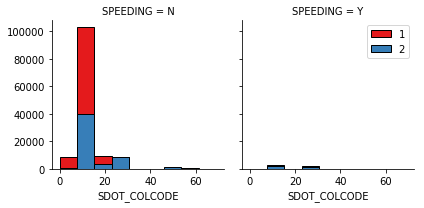

In [7]:
import seaborn as sns
bins = np.linspace(df.SDOT_COLCODE.min(), df.SDOT_COLCODE.max(), 10)
g = sns.FacetGrid(df, col="SPEEDING", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'SDOT_COLCODE', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [8]:
# Creating bins for SDOT_COLCODE 
bins = [-1,10,16,24,30,50,70]
df['SDOT_CTG'] = pd.cut(df['SDOT_COLCODE'], bins)
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,SEVERITYCODE,PERSONCOUNT,VEHCOUNT,SPEEDING,SDOT_COLCODE,SDOT_CTG
0,2,2,2,N,11,"(10, 16]"
1,1,2,2,N,16,"(10, 16]"
2,1,4,3,N,14,"(10, 16]"
3,1,3,3,N,11,"(10, 16]"
4,2,2,2,N,11,"(10, 16]"


Converting Categorical features to numerical values

In [9]:
df['SPEEDING'].replace(to_replace=['N','Y'], value=[0,1],inplace=True)
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,SEVERITYCODE,PERSONCOUNT,VEHCOUNT,SPEEDING,SDOT_COLCODE,SDOT_CTG
0,2,2,2,0,11,"(10, 16]"
1,1,2,2,0,16,"(10, 16]"
2,1,4,3,0,14,"(10, 16]"
3,1,3,3,0,11,"(10, 16]"
4,2,2,2,0,11,"(10, 16]"


#### Using one hot encoding technique to convert categorical varables to binary variables and append them to the feature Data Frame 

In [10]:
Feature = df[['PERSONCOUNT','VEHCOUNT','SPEEDING']]
Feature = pd.concat([Feature,pd.get_dummies(df['SDOT_CTG'])], axis=1)
Feature.head()

,PERSONCOUNT,VEHCOUNT,SPEEDING,"(-1, 10]","(10, 16]","(16, 24]","(24, 30]","(30, 50]","(50, 70]"
0,2,2,0,0,1,0,0,0,0
1,2,2,0,0,1,0,0,0,0
2,4,3,0,0,1,0,0,0,0
3,3,3,0,0,1,0,0,0,0
4,2,2,0,0,1,0,0,0,0


## 2. Transforming the attributes and target data for modelling

In [11]:
X = Feature
X[0:5]

,PERSONCOUNT,VEHCOUNT,SPEEDING,"(-1, 10]","(10, 16]","(16, 24]","(24, 30]","(30, 50]","(50, 70]"
0,2,2,0,0,1,0,0,0,0
1,2,2,0,0,1,0,0,0,0
2,4,3,0,0,1,0,0,0,0
3,3,3,0,0,1,0,0,0,0
4,2,2,0,0,1,0,0,0,0


In [12]:
# Target data
df['SEVERITYCODE'].replace(to_replace=[1,2], value=[0,1],inplace=True)
y = df['SEVERITYCODE'].values
y[0:5]

array([1, 0, 0, 0, 1])

In [13]:
# Attribute data
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


array([[-0.33020207,  0.12553783, -0.22440165, -0.23007677,  0.47908667,
        -0.23201337, -0.28203457, -0.04486132, -0.09861645],
       [-0.33020207,  0.12553783, -0.22440165, -0.23007677,  0.47908667,
        -0.23201337, -0.28203457, -0.04486132, -0.09861645],
       [ 1.15576451,  1.7102107 , -0.22440165, -0.23007677,  0.47908667,
        -0.23201337, -0.28203457, -0.04486132, -0.09861645],
       [ 0.41278122,  1.7102107 , -0.22440165, -0.23007677,  0.47908667,
        -0.23201337, -0.28203457, -0.04486132, -0.09861645],
       [-0.33020207,  0.12553783, -0.22440165, -0.23007677,  0.47908667,
        -0.23201337, -0.28203457, -0.04486132, -0.09861645]])

### Splitting dataset for training and testing 

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (155738, 9) (155738,)
Test set: (38935, 9) (38935,)


# 3. Creating a prediction model

### Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score


depth_range = range(1, 15)
jaccard_similarity_score_ = []
f1_score_ = []

for d in depth_range:
    dt = DecisionTreeClassifier(criterion = 'gini', max_depth = d)
    dt.fit(X_train, y_train)
    dt_yhat = dt.predict(X_test)
    jaccard_similarity_score_.append(jaccard_similarity_score(y_test, dt_yhat))
    f1_score_.append(f1_score(y_test, dt_yhat, average = 'weighted'))

In [16]:
# MAX DEPTH

result = pd.DataFrame([jaccard_similarity_score_, f1_score_], index = ['Jaccard', 'F1'], columns = ['d = 1','d = 2','d = 3','d = 4','d = 5','d = 6','d = 7','d = 8','d = 9','d = 10','d = 11','d = 12','d = 13','d = 14'])
result.columns.name = 'Metric'
result

Metric,d = 1,d = 2,d = 3,d = 4,d = 5,d = 6,d = 7,d = 8,d = 9,d = 10,d = 11,d = 12,d = 13,d = 14
Jaccard,0.744728,0.744728,0.751817,0.751817,0.754899,0.754103,0.757185,0.757236,0.758007,0.758341,0.758572,0.758444,0.758392,0.758392
F1,0.674102,0.674102,0.688025,0.688025,0.709988,0.697537,0.709707,0.710184,0.712149,0.712657,0.712902,0.712779,0.712718,0.712678


In [17]:
# Best d 
    
dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 11)
dt_model.fit(X_train, y_train)
dt_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import log_loss

import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
solvers = ['lbfgs', 'saga', 'liblinear', 'newton-cg', 'sag']
regularization_val = [0.1, 0.01, 0.001]
index = []
accuracy_score = []
iterations = 0

for index1, c in enumerate(regularization_val):
    for index2, solver in enumerate(solvers):
        index.append(index1 + index2 *5)
        iterations +=1
        lr_model = LogisticRegression(C = c, solver = solver)
        lr_model.fit(X_train, y_train)
        lr_yhat = lr_model.predict(X_test)
        y_prob = lr_model.predict_proba(X_test)
        print('Test {}: Accuracy at C = {} when Solver = {} is : {}'.format(iterations, c, solver, log_loss(y_test, y_prob) ))
        accuracy_score.append(log_loss(y_test, y_prob))
                              
    print('\n')

Test 1: Accuracy at C = 0.1 when Solver = lbfgs is : 0.536362977814543
Test 2: Accuracy at C = 0.1 when Solver = saga is : 0.5363628153803185
Test 3: Accuracy at C = 0.1 when Solver = liblinear is : 0.536364315870436


/opt/conda/envs/Python36/lib/python3.6/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


Test 4: Accuracy at C = 0.1 when Solver = newton-cg is : 0.5363629799412115
Test 5: Accuracy at C = 0.1 when Solver = sag is : 0.5363630335492605


Test 6: Accuracy at C = 0.01 when Solver = lbfgs is : 0.5363741045930653
Test 7: Accuracy at C = 0.01 when Solver = saga is : 0.536374101868277
Test 8: Accuracy at C = 0.01 when Solver = liblinear is : 0.5363885967706656
Test 9: Accuracy at C = 0.01 when Solver = newton-cg is : 0.5363741073903643
Test 10: Accuracy at C = 0.01 when Solver = sag is : 0.5363744066434301


Test 11: Accuracy at C = 0.001 when Solver = lbfgs is : 0.5366016233470053
Test 12: Accuracy at C = 0.001 when Solver = saga is : 0.5366016763596609
Test 13: Accuracy at C = 0.001 when Solver = liblinear is : 0.5368248123917732


/opt/conda/envs/Python36/lib/python3.6/site-packages/scipy/optimize/linesearch.py:422: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


Test 14: Accuracy at C = 0.001 when Solver = newton-cg is : 0.536601636997587
Test 15: Accuracy at C = 0.001 when Solver = sag is : 0.5366015102889695




Text(0, 0.5, 'Testing Accuracy')

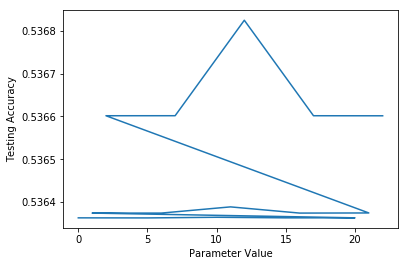

In [20]:
# Visualization

lr_prob = lr_model.predict_proba(X_test)
log_loss(y_test, lr_prob)
plt.plot(index, accuracy_score)
plt.xlabel('Parameter Value')
plt.ylabel('Testing Accuracy')

In [21]:
# Main Model

from sklearn.linear_model import LogisticRegression 

lr_model = LogisticRegression(C = 0.1, solver = 'sag')
lr_model.fit(X_train, y_train)
lr_model

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

## 4. Analysing the accuracy of the prediction model on test sets

In [22]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [23]:
# Jaccard
from sklearn.metrics import jaccard_similarity_score



# Decision Tree
dt_yhat = dt_model.predict(X_test)
jss1 = round(jaccard_similarity_score(y_test, dt_yhat), 2)


# Logistic Regression
lr_yhat = lr_model.predict(X_test)
jss2 = round(jaccard_similarity_score(y_test, lr_yhat), 2)

jss_list = [jss1, jss2]
jss_list

[0.76, 0.75]

In [24]:
# F1_score
from sklearn.metrics import f1_score

# Decision Tree
dt_yhat = dt_model.predict(X_test)
f1 = round(f1_score(y_test, dt_yhat, average = 'weighted'), 2)

# Logistic Regression
lr_yhat = lr_model.predict(X_test)
f2 = round(f1_score(y_test, lr_yhat, average = 'weighted'), 2)

f1_list = [f1, f2]
f1_list

[0.71, 0.7]

In [25]:
# log loss
from sklearn.metrics import log_loss

# Logistic Regression
lr_prob = lr_model.predict_proba(X_test)
ll_list = ['NA', round(log_loss(y_test, lr_prob), 2)]
ll_list

['NA', 0.54]

In [27]:
columns = ['Decision Tree', 'Logistic Regression']
index = ['Jaccard', 'F1-score', 'Logloss']
accuracy_df = pd.DataFrame([jss_list, f1_list, ll_list], index = index, columns = columns)
accuracy_df1 = accuracy_df.transpose()
accuracy_df1.columns.name = 'Algorithm'
accuracy_df1

Algorithm,Jaccard,F1-score,Logloss
Decision Tree,0.76,0.71,NA
Logistic Regression,0.75,0.7,0.54
